In [20]:
from tensorflow.keras import layers, models, regularizers
from tensorflow.keras.datasets import reuters

In [2]:
(train_data, train_labels),(test_data, test_labels) = reuters.load_data(num_words=10000)

/home/santi/anaconda3/envs/neuronal_networks_examples/lib/python3.9/site-packages/tensorflow/python/keras/datasets/reuters.py:148: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/home/santi/anaconda3/envs/neuronal_networks_examples/lib/python3.9/site-packages/tensorflow/python/keras/datasets/reuters.py:149: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


### Diccionario de palabras

In [3]:
labels_dic =['cocoa','grain','veg-oil','earn','acq','wheat','copper','housing','money-supply',
'coffee','sugar','trade','reserves','ship','cotton','carcass','crude','nat-gas',
'cpi','money-fx','interest','gnp','meal-feed','alum','oilseed','gold','tin',
'strategic-metal','livestock','retail','ipi','iron-steel','rubber','heat','jobs',
'lei','bop','zinc','orange','pet-chem','dlr','gas','silver','wpi','hog','lead']

In [4]:
words = reuters.get_word_index()
words_dict = dict([(value,key) for (key,value) in words.items()])

In [5]:
def translater(data):
  text = ""
  for _ in data:
    text = text + str(words_dict.get(_ - 3)) + " "
  return text

In [6]:
print(translater(train_data[0]))
print(train_labels[0])

None None None said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3 
3


In [7]:
#train_data no es un tensor, por eso necesitamos vectorizar 
train_data.shape

(8982,)

In [8]:
import numpy as np

In [9]:
def vectorizar(sequences, dim=10000):
  results = np.zeros((len(sequences), dim))
  for index, sequences in enumerate(sequences):
    results[index,sequences]=1
  return results

In [10]:
x_train = vectorizar(train_data)
x_test = vectorizar(test_data)
print(x_train.shape)
print(x_train[0])

(8982, 10000)
[0. 1. 1. ... 0. 0. 0.]


In [11]:
from tensorflow.keras.utils import to_categorical

In [12]:
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

print(y_train.shape)
print(y_train)

(8982, 46)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


### Creando la red

In [23]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,), kernel_regularizer=regularizers.l2(0.01)))
model.add(layers.Dropout(0.6))
model.add(layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(46, activation='softmax'))

In [24]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['acc']   
             )

In [15]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = y_train[:1000]
partial_y_train =  y_train[1000:]

In [25]:

history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs=14,
                   batch_size=256,
                   validation_data=(x_val,y_val))

Epoch 1/14
32/32 [==============================] - 3s 71ms/step - loss: 4.3868 - acc: 0.2572 - val_loss: 2.4715 - val_acc: 0.5550
Epoch 2/14
32/32 [==============================] - 1s 47ms/step - loss: 2.6166 - acc: 0.5328 - val_loss: 2.1182 - val_acc: 0.6200
Epoch 3/14
32/32 [==============================] - 2s 47ms/step - loss: 2.2689 - acc: 0.5765 - val_loss: 1.9294 - val_acc: 0.6660
Epoch 4/14
32/32 [==============================] - 1s 44ms/step - loss: 2.0644 - acc: 0.6129 - val_loss: 1.8328 - val_acc: 0.6670
Epoch 5/14
32/32 [==============================] - 1s 45ms/step - loss: 1.9136 - acc: 0.6378 - val_loss: 1.7383 - val_acc: 0.6820
Epoch 6/14
32/32 [==============================] - 2s 66ms/step - loss: 1.8196 - acc: 0.6522 - val_loss: 1.6669 - val_acc: 0.6920
Epoch 7/14
32/32 [==============================] - 2s 50ms/step - loss: 1.7780 - acc: 0.6650 - val_loss: 1.6256 - val_acc: 0.6950
Epoch 8/14
32/32 [==============================] - 2s 57ms/step - loss: 1.7191 - a

### Validamos resultados

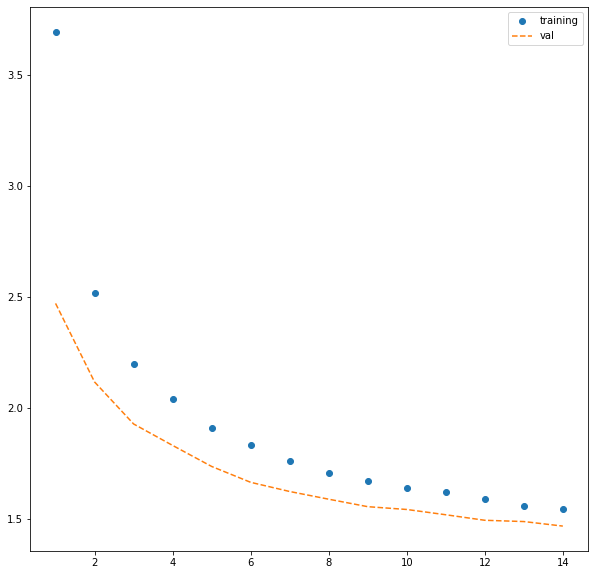

In [26]:
import matplotlib.pyplot as plt 


#validación de perdida para valores de entrenamiento y de validación
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

fig = plt.figure(figsize=(10,10))
epoch = range(1,len(loss_values)+1)
plt.plot(epoch,loss_values, 'o',label='training')
plt.plot(epoch,val_loss_values, '--',label='val')
plt.legend()
plt.show()

### realizar predución

In [27]:

#todas las prediciones de los datos de test
# predictions = model.predict(x_test[0])

#solo el primer dato de test
predictions = model.predict(np.array([x_test[0]]))


In [28]:
#validamos que hizo una predicción correcta

print("la predicion es: " + labels_dic[np.argmax(predictions[0])])
print("el valor correcto es: "+ labels_dic[test_labels[0]])

la predicion es: earn
el valor correcto es: earn
